# PHASE 1: Data Understanding & Basic Feature Engineering

# IMPORTING ALL LIBS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('default')

# Dataset Load

In [3]:
df = pd.read_excel("OLA_DataSet.xlsx")

In [4]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [5]:
df.shape

(103024, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [9]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [10]:
df.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [11]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [12]:
(df.isnull().sum() / len(df)) * 100

Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
Vehicle Images                 0.000000
dtype: float64

In [13]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.dtypes

Date                          datetime64[ns]
Time                                  object
Booking_ID                            object
Booking_Status                        object
Customer_ID                           object
Vehicle_Type                          object
Pickup_Location                       object
Drop_Location                         object
V_TAT                                float64
C_TAT                                float64
Canceled_Rides_by_Customer            object
Canceled_Rides_by_Driver              object
Incomplete_Rides                      object
Incomplete_Rides_Reason               object
Booking_Value                          int64
Payment_Method                        object
Ride_Distance                          int64
Driver_Ratings                       float64
Customer_Rating                      float64
Vehicle Images                        object
DateTime                      datetime64[ns]
dtype: object

# FEATURE ENGINEERING

In [14]:
df.drop_duplicates(inplace=True)

In [20]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

# Removed Non-analytical column

In [22]:
df = df.drop(columns=['Vehicle Images'])

# CREATED EXTRA NEEDFUL COLUMNS 

In [24]:
df["is_successful_booking"] = df["Booking_Status"].apply(
    lambda x: 1 if x == "Success" else 0
)

In [25]:
df["is_customer_cancelled"] = df["Booking_Status"].apply(
    lambda x: 1 if x == "Canceled by Customer" else 0
)

In [27]:
df["is_driver_cancelled"] = df["Booking_Status"].apply(
    lambda x: 1 if x == "Canceled by Driver" else 0
)

In [28]:
df[["Booking_Status", "is_successful_booking", 
    "is_customer_cancelled", "is_driver_cancelled"]].head()

,Booking_Status,is_successful_booking,is_customer_cancelled,is_driver_cancelled
0,Canceled by Driver,0,0,1
1,Success,1,0,0
2,Success,1,0,0
3,Canceled by Customer,0,1,0
4,Success,1,0,0


In [30]:
df["booking_hour"] = pd.to_datetime(
    df["Time"].astype(str),
    format="%H:%M:%S"
).dt.hour

In [32]:
df["booking_day"] = df["Date"].dt.day

In [33]:
df["booking_weekday"] = df["Date"].dt.day_name()

In [34]:
df["booking_weekday_num"] = df["Date"].dt.weekday

In [35]:
df[["Date", "Time", "booking_hour", "booking_day", 
    "booking_weekday", "booking_weekday_num"]].head()

,Date,Time,booking_hour,booking_day,booking_weekday,booking_weekday_num
0,2024-07-26 14:00:00,14:00:00,14,26,Friday,4
1,2024-07-25 22:20:00,22:20:00,22,25,Thursday,3
2,2024-07-30 19:59:00,19:59:00,19,30,Tuesday,1
3,2024-07-22 03:15:00,03:15:00,3,22,Monday,0
4,2024-07-02 09:02:00,09:02:00,9,2,Tuesday,1


# PHASE 2: UNIVARIATE ANALYSIS

# 2.1 Booking Status Distribution

In [36]:
status_counts = df['Booking_Status'].value_counts()
status_percent = df['Booking_Status'].value_counts(normalize=True) * 100

status_counts, status_percent

(Booking_Status
 Success                 63967
 Canceled by Driver      18434
 Canceled by Customer    10499
 Driver Not Found        10124
 Name: count, dtype: int64,
 Booking_Status
 Success                 62.089416
 Canceled by Driver      17.892918
 Canceled by Customer    10.190829
 Driver Not Found         9.826836
 Name: proportion, dtype: float64)

# PLOTTING

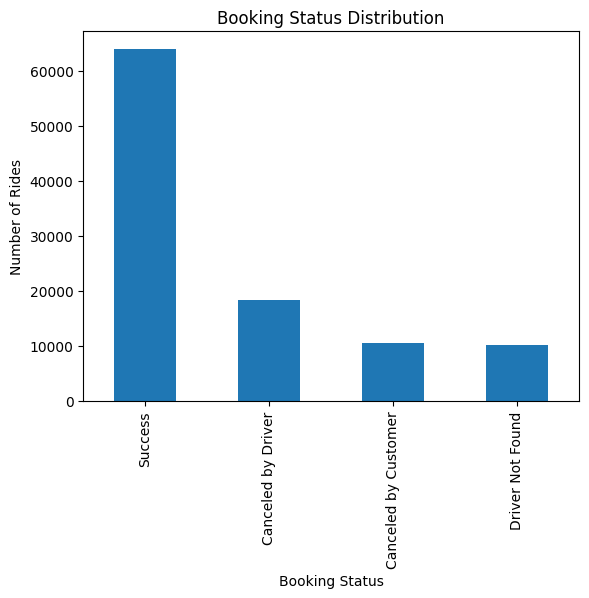

In [37]:
import matplotlib.pyplot as plt

plt.figure()
status_counts.plot(kind='bar')
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Rides")
plt.show()

INSIGHT : Majority of bookings are successful; however, a significant share of cancellations exists, indicating scope for operational improvement.

# 2.2 Vehicle Type Usage

In [38]:
vehicle_counts = df['Vehicle_Type'].value_counts()
vehicle_counts

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64

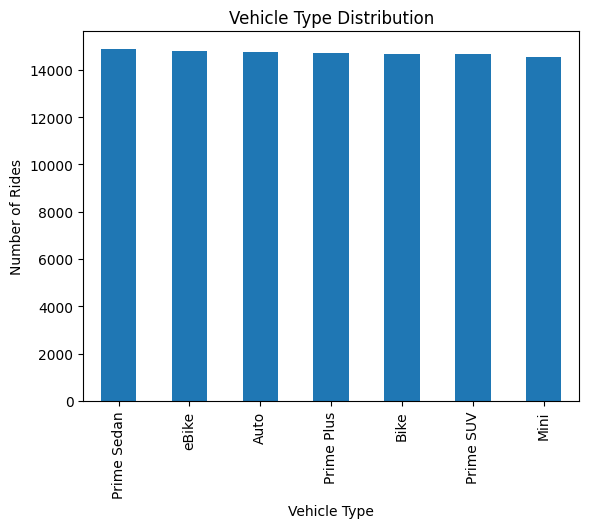

In [39]:
plt.figure()
vehicle_counts.plot(kind='bar')
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Rides")
plt.show()

INSIGHT : Demand is concentrated around specific vehicle types, reflecting customer cost and convenience preferences.

# 2.3 Payment Method (ONLY where available)

In [41]:
payment_counts = df['Payment_Method'].value_counts()
payment_counts

Payment_Method
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64

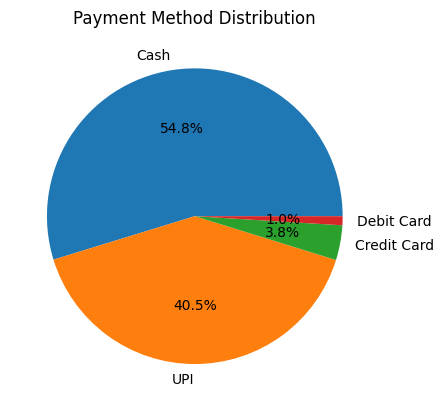

In [42]:
plt.figure()
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

INSIGHT : Digital payment methods dominate, indicating strong adoption of cashless transactions.

# PHASE 3: TEMPORAL ANALYSIS (TIME-BASED)

# 3.1 Peak Hour Analysis

In [43]:
hourly_demand = df['booking_hour'].value_counts().sort_index()
hourly_demand

booking_hour
0     4318
1     4329
2     4305
3     4201
4     4263
5     4264
6     4271
7     4304
8     4374
9     4347
10    4334
11    4272
12    4408
13    4285
14    4232
15    4376
16    4261
17    4353
18    4176
19    4271
20    4228
21    4343
22    4283
23    4226
Name: count, dtype: int64

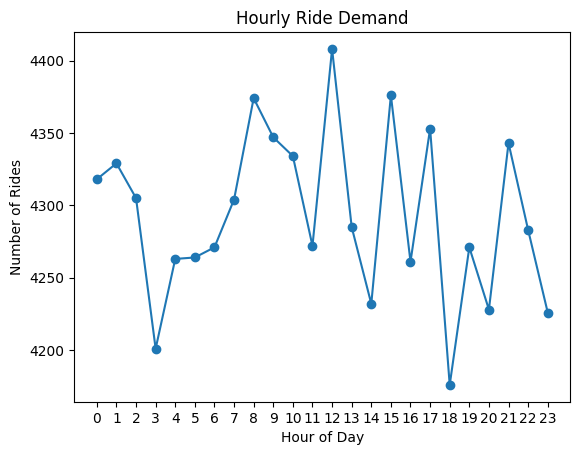

In [44]:
plt.figure()
hourly_demand.plot(kind='line', marker='o')
plt.title("Hourly Ride Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.xticks(range(0,24))
plt.show()

INSIGHT : Ride demand peaks during morning and evening hours, aligning with daily commute patterns.

# 3.2 Day-wise Demand (Weekday vs Weekend)

In [45]:
weekday_demand = df['booking_weekday'].value_counts()
weekday_demand

booking_weekday
Tuesday      16926
Monday       16729
Wednesday    16434
Friday       13345
Saturday     13341
Thursday     13236
Sunday       13013
Name: count, dtype: int64

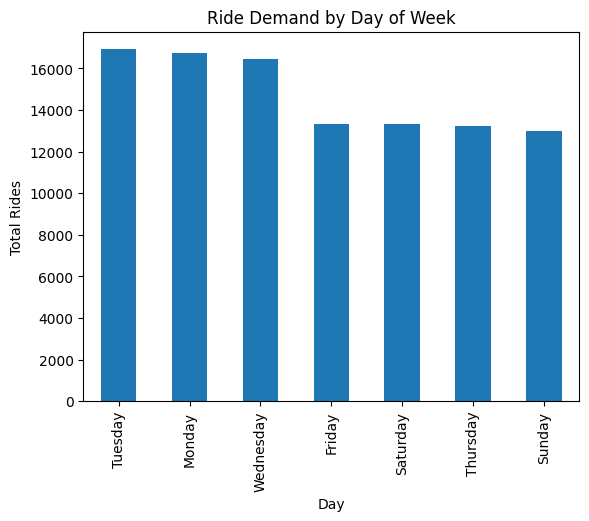

In [46]:
plt.figure()
weekday_demand.plot(kind='bar')
plt.title("Ride Demand by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Rides")
plt.show()

INSIGHT : Demand is higher on weekdays, indicating work-related travel dominance.

# 💰 PHASE 4: NUMERICAL ANALYSIS (FARE, DISTANCE, RATINGS)

# 4.1 Booking Value Distribution

In [47]:
df['Booking_Value'].describe()

count    103024.000000
mean        548.751883
std         536.541221
min         100.000000
25%         242.000000
50%         386.000000
75%         621.000000
max        2999.000000
Name: Booking_Value, dtype: float64

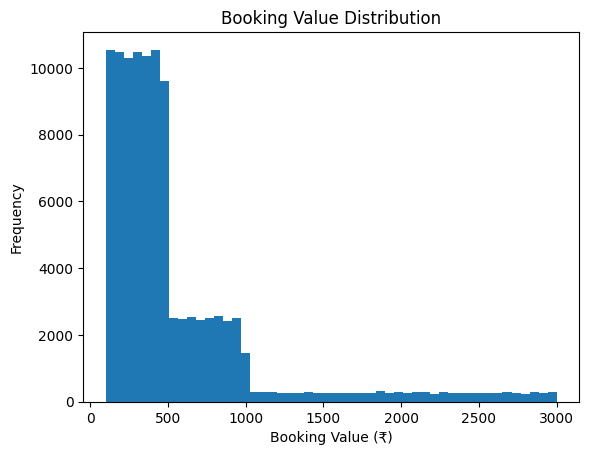

In [48]:
plt.figure()
plt.hist(df['Booking_Value'], bins=50)
plt.title("Booking Value Distribution")
plt.xlabel("Booking Value (₹)")
plt.ylabel("Frequency")
plt.show()

INSIGHT : Most rides fall within lower fare ranges, while high-value rides indicate surge pricing or longer trips.

# 4.2 Ride Distance vs Booking Value

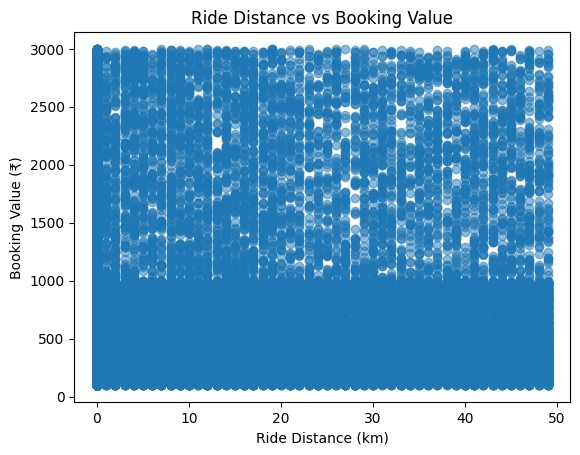

In [49]:
plt.figure()
plt.scatter(df['Ride_Distance'], df['Booking_Value'], alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value (₹)")
plt.show()

INSIGHT : Booking value increases with distance, confirming logical pricing behavior.

# 4.3 Ratings Analysis (ONLY Completed Rides)

In [50]:
completed = df[df['Booking_Status'] == 'Completed']
completed[['Driver_Ratings', 'Customer_Rating']].describe()

,Driver_Ratings,Customer_Rating
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


<Figure size 640x480 with 0 Axes>

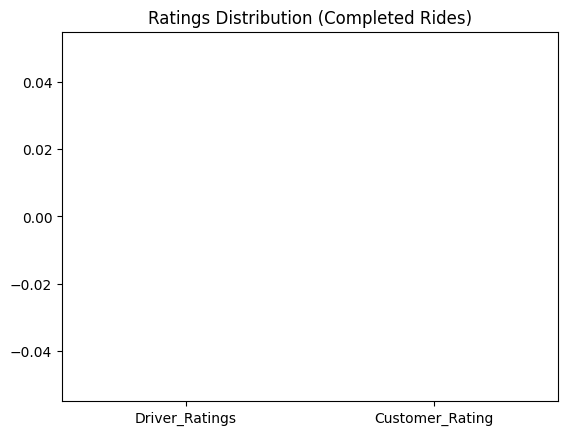

In [51]:
plt.figure()
completed[['Driver_Ratings', 'Customer_Rating']].plot(kind='box')
plt.title("Ratings Distribution (Completed Rides)")
plt.show()

INSIGHT : Ratings are consistently high, indicating good service quality among completed rides.

# ❌ PHASE 5: CANCELLATION & INCOMPLETE RIDE ANALYSIS

# 5.1 Customer vs Driver Cancellation

In [52]:
df[['is_customer_cancelled', 'is_driver_cancelled']].sum()

is_customer_cancelled    10499
is_driver_cancelled      18434
dtype: int64

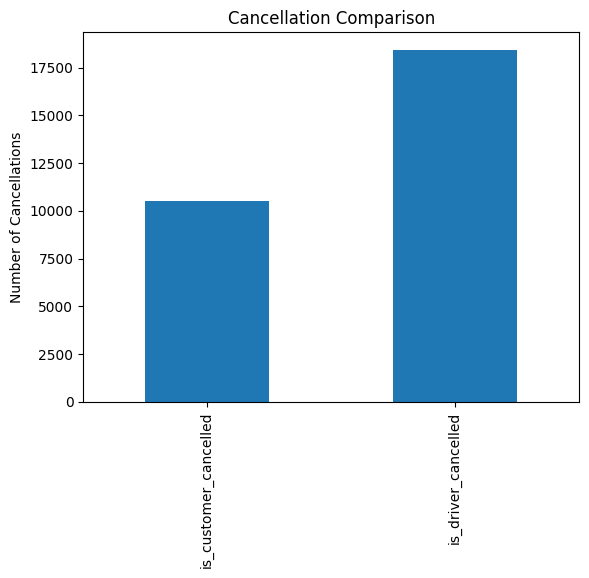

In [53]:
df[['is_customer_cancelled', 'is_driver_cancelled']].sum().plot(kind='bar')
plt.title("Cancellation Comparison")
plt.ylabel("Number of Cancellations")
plt.show()

INSIGHT : Customer-initiated cancellations are higher, suggesting issues like waiting time or pricing sensitivity.

# 5.2 Incomplete Ride Reasons

In [54]:
df['Incomplete_Rides_Reason'].value_counts()

Incomplete_Rides_Reason
Customer Demand      1601
Vehicle Breakdown    1591
Other Issue           734
Name: count, dtype: int64

INSIGHT : Only a small subset of rides contain incomplete ride reasons, indicating selective logging of failure causes.

In [60]:
df = df.drop(columns=['DateTime'])

# SAVED CLEANED FILE 

In [61]:
df.to_csv(
    "ola_rides_cleaned.csv",
    index=False
)